# 3 사이킷런을 타고 떠나는 머신러닝 분류 모델 여행

* 3.1 분류 알고리즘 선택
* 3.2 사이킷런 첫걸음: 퍼셉트론 훈련
* 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링
* 3.4 서포트 벡터 머신을 사용한 최대 마진 분류
* 3.5 커널 SVM을 사용하여 비선형 문제 풀기
* 3.6 결정 트리 학습
* 3.7 k-접근점 이웃: 게으른 학습 알고리즘


**주제**

* 강력하고 인기 있는 분류 알고리즘인 로지스틱 회귀(Logistic Regression), 서포트 벡터 머신(Support Vector Machine, SVM), 결정 트리(Decision Tree), k-최근 이웃을 사용하여 분류 문제를 해결하는 방법을 배웁니다.
* 예제와 설명을 위해 사이킷런을 사용합니다.
* 선형 또는 비선형 결정 경계를 갖는 분류 알고리즘의 강점과 약점을 이해합니다.

## 3.1 분류 알고리즘 선택

분류 모델의 예측 성능과 계산 능력은 학습하려는 데이터에 크게 의존한다.

>데이터의 크기, 차원, 특성, 클래스의 수, 클래스의 분포, 클래스의 불균형 여부, 데이터의 선형적 분리 가능 여부 등을 고려해야 한다.

머신 러닝 알고리즘을 훈련하기 위한 주요 단계

1. 특성을 선택하고 훈련 데이터를 수집한다.
2. 성능 지표를 선택한다.
3. 학습 알고리즘을 선택하고 모델을 훈련한다.
4. 모델의 성능을 평가한다.
5. 알고리즘 설정을 바꾸고 모델을 튜닝한다.

## 3.2 사이킷런 첫걸음: 퍼셉트론 훈련

* 붓꽃 데이터셋을 사용하여 퍼셉트론 모델을 훈련한다.
* 150개의 꽃 샘플에서 꽃잎 길이와 꽃잎 너비를 특성 행렬 X에 저장하고 꽃의 품종을 타깃 벡터 y에 저장한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("클래스 레이블:", np.unique(y))


클래스 레이블: [0 1 2]


* np.unique(y) : 타깃 벡터 y에 있는 고유한 값의 개수를 출력한다. (붓꽃의 클래스 이름은 Iris-setosa, Iris-versicolor, Iris-virginica) 정수화 되어 저장 되어 있다.
* 정수 레이블을 사용하여 사소한 실수를 피할 수 있다.

---
* 다음으로 훈련세트와 테스트 세트로 나눈다. 
* 훈련 세트는 모델을 훈련하는 데 사용되고 테스트 세트는 모델의 성능을 평가하는 데 사용된다.
* 여기서는 훈련 세트의 70%를 사용하여 훈련하고 나머지 30%를 사용하여 모델을 평가한다.
* 훈련 세트와 테스트 세트를 나누기 위해 사이킷런의 train_test_split 함수를 사용한다.
* random_state 매개변수를 사용하여 무작위로 데이터를 섞은 다음 나눈다. (random_state=1로 지정하면 항상 같은 결과를 얻을 수 있다.)
* stratify=y : 클래스 레이블이 훈련 세트와 테스트 세트에 같은 비율로 있도록 만든다.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


2장 **경사 하강법** 예제에서 보았던 것처럼 스케일 조정이 필요하다. 사이킷런의`preprocessing` 모듈의 `StandardScaler` 클래스를 사용하여 특성을 표준화한다.

* `preprocessing` 모듈에서 `StandardScaler` 클래스의 fit메서드는 훈련 데이터셋의 각 특성 차원마다 $\mu$(샘플 평균)와 $\sigma$(표준 편차)를 계산한다.

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

훈련 데이터를 표준화 한 다음 퍼셉트론 모델을 훈련한다. 사이킷런의 알고리즘은 대부분 기본적으로 OvR(One-versus-Rest) 방식을 사용한다.

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

linear_model모듈에서 Perceptron 클래스의 `fit` 메서드를 사용하여 모델을 훈련한다. 매개변수 `eta0`는 학습률을 지정한다.
`random_state`는 난수 초깃값을 지정한다.

In [7]:
# 예측
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


이 모델은 45개의 샘플에서 1개를 잘못 분류 했다. 테스트 데이터셋에 대한 분류 오차는 약 `0.022, 2.2%`이다.

**사이킷런에서 제공하는 성능지표**

In [9]:
# 정확도
from sklearn.metrics import accuracy_score
print('정확도: %.2f' % accuracy_score(y_test, y_pred))
print('정확도', ppn.score(X_test_std, y_test))

정확도: 0.98
정확도 0.9777777777777777


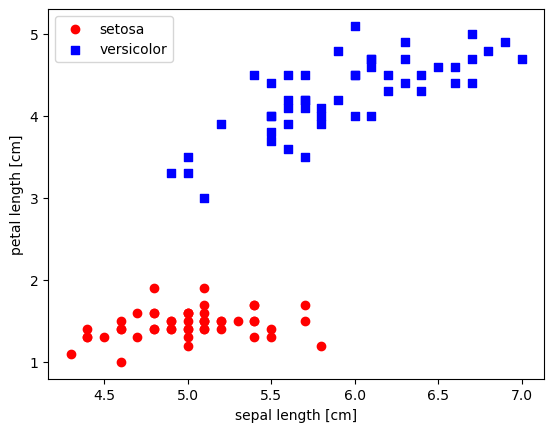

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다.
y = iris_df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다.
X = iris_df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다.
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [32]:
X = iris.data[:, [2, 3]] # type: ignore
y = iris.target #type: ignore
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


`np.unique(y)`를 사용하여 클래스 레이블을 확인한다.

In [33]:
# check class labels
print(iris_df['species'].unique())

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']


**데이터셋 분할**

훈련 데이터셋과 테스트 데이터셋을 분할한다.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # stratify=y를 사용하여 계층화 샘플링을 수행합니다.
print("y의 레이블 카운트:", np.bincount(y))
print("y_train의 레이블 카운트:", np.bincount(y_train))
print("y_test의 레이블 카운트:", np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [35]:
# 특성을 표준화합니다. sklearn의 StandardScaler를 사용하여 특성을 표준화합니다.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**퍼셉트론 모델 훈련**

* 사이킷런의 Perceptron 클래스를 사용하여 퍼셉트론 모델을 훈련한다.
* 사이킷런 알고리즘은 대부분 기본적으로 OvR(One-versus-Rest) 방식을 사용하여 다중 분류(mutliclass classification)를 지원한다.

In [36]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [37]:
y_pred = ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수: %d" % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [38]:
from sklearn.metrics import accuracy_score
print("정확도: %.2f" % accuracy_score(y_test, y_pred))

정확도: 0.98


**퍼셉트론 모델의 시각화**

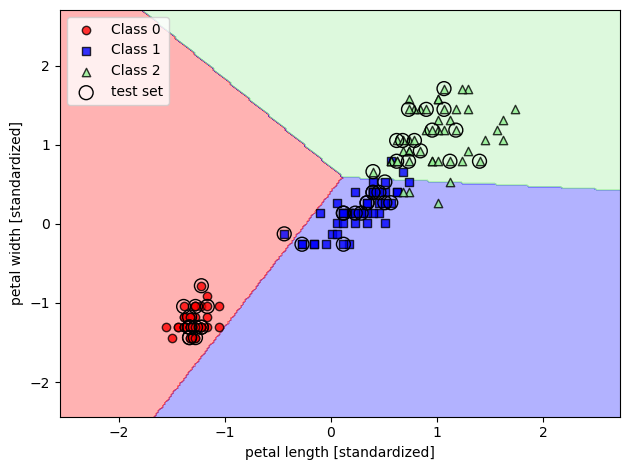

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



def plot_dicision_regions(X, y, classifier: Perceptron, test_idx=None, resolution=0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # 결정 경계를 그립니다.
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f"Class {cl}", edgecolor='black')
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
X_combined_std = np.vstack((X_train_std, X_test_std)) # type: ignore
y_combined = np.hstack((y_train, y_test))
plot_dicision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

퍼셉트론 규칙은 머신 러닝 분류 알고리즘을 배우기에 간단하고 좋은 모델이지만 가장 큰 단점은 클래스가 *선형적으로 구분되지 않을 때 수렴할 수 없다.*   이전에 만든 예에서도 에포크마다 적어도 하나의 샘플이 잘못 분류되기 때문에 가중치 업데이트가 끝도 없이 계속된다. 퍼셉트론은 이 문제를 절대로 수렴할 수 없다.

선형 이진 분류 문제에 퍼셉트론 보다 더 강력한 알고리즘은 **로지스틱 회귀(Logistic Regression)**이다. 로지스틱 회귀는 선형 결정 경계를 학습하여 샘플이 특정 클래스에 속할 확률을 추정한다. 로지스틱 회귀 알고리즘은 회귀하지 않는다.(?)


### 3.3.1 로지스틱 회귀의 이해와 조건부 확률

* 로지스틱 회귀는 선형 결합을 시그모이드 함수에 적용하여 클래스 확률을 예측한다.
* 로지스틱 회귀는 이진 분류를 위한 선형 모델이다.

**오즈비**

* 오즈는 특정 이벤트가 발생할 확률$\frac{p}{(1-p)}$이다. 이때 p는 양성 샘플이 발생할 확률이다.
* 양성 샘플은 타깃 클래스에 속하는 샘플이다.
* 확률 $p$를 특성$x$인 샘플이 클래스 1에 속할 확률$p:=P(y=1|x)$로 정의할 수 있다.

오즈비에 로그를 취한 로짓 함수를 사용하여 선형 결합을 계산한다.
$$
logit(p) = log\frac{P}{1-P}
$$

log는 컴퓨터 과학에서 자연로그를 의미한다. logit함수는 0과 1사이의 입력값을 받아 실수 범위로 변환한다.

로지스틱 모델에서는 가중치가 적용된 입력과 로그 오즈 사이에 선형 관계가 있다고 가정한다.

$$
logit(p) = w_{1}x_{1} + ... + w_{m}x_{m} + b = \sum_{i=j}w_{i}x_{j} = w^{T}x + b
$$

logit함수를 거꾸로 뒤집으면 로지스틱 시그모이드 함수(logistic sigmoid function)가 된다.
$$
\phi(z) = \frac{1}{1+e^{-z}}
$$

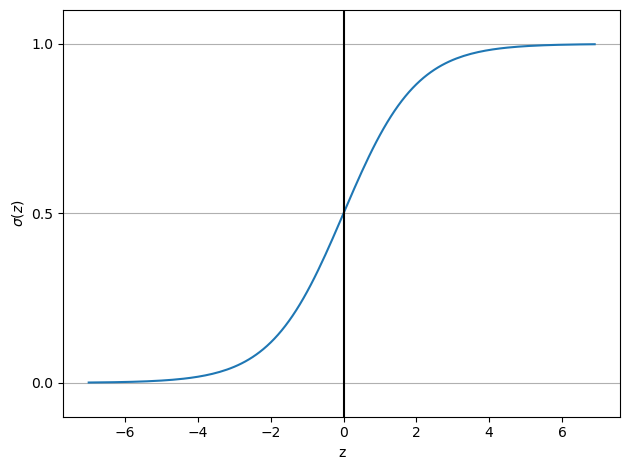

In [12]:
# 시그모이드 함수 그려보기

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel(r'$\sigma (z)$')
# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

* $z$가 무한대로 가면$(z \rightarrow \infty)e^{-z}$가 매우 작아지기 때문에$\sigma(z)$는 1에 가까워진다.
* 비슷하게 $z \rightarrow -\infty$로 가면$\sigma(z)$는 0에 가까워진다.
* 중간 값은 $\sigma(0) = 0.5$이다.

---
로지스틱 회귀 와 아달린의 차이점은 로지스틱 회귀는 활성화 함수로 시그모이드를 아달린은 항등 함수를 사용한다.

가중치와 절편 파라미터$w$와$b$를 사용하여 특성 $x$에 대한 시그모이드 함수의 출력을 특정 샘플 클래스 1에 속할 확률$\sigma(z)=P(y=1|x;w,b)$로 해석한다. 에를 들어 어떤 샘플이$\sigma(z)=0.8$이면 이 샘플이 클래스 1에 속할 확률이 80%라는 뜻이다. 클래스 0에 속할 확률은$P(y=0|x;w,b)=1-P(y=1|x;w,b)$처럼 계산되어 20%가 된다.ㅇ  

### 3.3.2 로지스틱 손실 함수의 가중치 학습

로지스틱 회귀 모델을 훈련하기 위해 가중치를 학습하는 것은 선형 회귀 모델과 비슷하다.

**평균 제곱 오차 손실 함수**
$$
L(w,b|x) = \sum_{i}\frac{1}{2}(\sigma(z^{(i)} - y^{(i)})^{2}
$$

* 아달린 분류 모델에서 이 함수를 최소화하는 파라미터를 학습한다.

로지스틱 회귀 모델을 만들 때 최대화 하려는 가능도(likelihood)를 정의한다.

$$
L(w,b) = p(y|x;w,b)  \\
= \prod_{i=1}^{n}p(y^{(i)}|x^{(i)};w,b) \\
= \prod_{i=1}^{n}(\sigma(z^{(i)}))^{y^{(i)}}(1-\sigma(z^{(i)}))^{1-y^{(i)}}
$$

* 로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상의 언더플로(underflow)를 방지할 수 있다.
* 계수의 곱을 계수의 합으로 변환할 수 있다.

**로그 가능도 함수 유도하기**
---
데이터가 주어졌을 때 가능도$L(w,b|x)$에 대한 표현식을 유도한다.

클래스 레이블이 0과 1인 이진 분류 문제일 경우 레이블 1을 베르누이 변수(Bernoulli variable)Y~Bern(p)로 생각할 수 있다.

이 변수는 p의 확률로 1또는 0 두 값을 가질 수 있다.

하나의 데이터 포인트에 대해 아 확률을 $P(Y=1|X=x^{(i)} = \sigma(z^{(i)}))와P=(Y=0|X=x^{(i)})=1-\sigma(z^{(i)})$로 표현할 수 있다.

두 식을 합치고 $P(Y=y^{(i)}|X=x^{(i)})=p(y^{(i)}|x^{(i)})$를 사용하여 하나의 식으로 표현할 수 있다.

$$
p(y^{(i)}|x^{(i)}) = (\sigma(z^{(i)}))^{y^{(i)}}(1-\sigma(z^{(i)}))^{1-y^{(i)}}
$$

모든 훈련 샘플이 독립적이라는 가정하에 모든 에빈트가 발생할 확률을 계산하는 곱셈 규칙을 사용하여 훈련 레이블의 가능도를 계산할 수 있다.

$$
L(w,b|x) = \prod_{i=1}^{n}p(y^{(i)}|x^{(i)};w,b)
$$

이제 베르누이 변수의 확률 질량 함수로 대처하면 모델 파라미터 업데이트를 통해 최대화시킬 가능도도 공식을 유도할 수 있다.

$$
L(w,b|x) = \prod_{i=1}^{n}(\sigma(z^{(i)}))^{y^{(i)}}(1-\sigma(z^{(i)}))^{1-y^{(i)}}
$$

경사 상승법 같은 최적화 알고리즘을 사용하여 이 로그 가능도 함수를 최대화할 수 있다.

또는 로그 가능도 함수를 다시 손실 함수(L)로 표현하여 경사 하강법을 사용하여 최소화할 수 있다.

$$
L(w,b) = \sum_{i=1}^{n}[y^{(i)}log(\sigma(z^{(i)})) - (1-y^{(i)})log(1-\sigma(z^{(i)}))]
$$

***샘플 계산***

$$
L(\sigma(z), y;w,b) = -ylog(\sigma(z)) -1 (1-y)log(1-\sigma(z))
$$

y가 0일 때 첫 번째 항이 0이 된다. y가 1일 때 두 번째 항이 0이 된다.

$$
L(\sigma(z), y; w,b) = \begin{cases} -log(\sigma(z)) & \text{if} y=1 \\ -log(1-\sigma(z)) & \text{if} y=0 \end{cases}

$\sigma(z)$가 1에 가까워지면 첫 번째 항이 0에 가까워진다. $\sigma(z)$가 0에 가까워지면 두 번째 항이 0에 가까워진다.

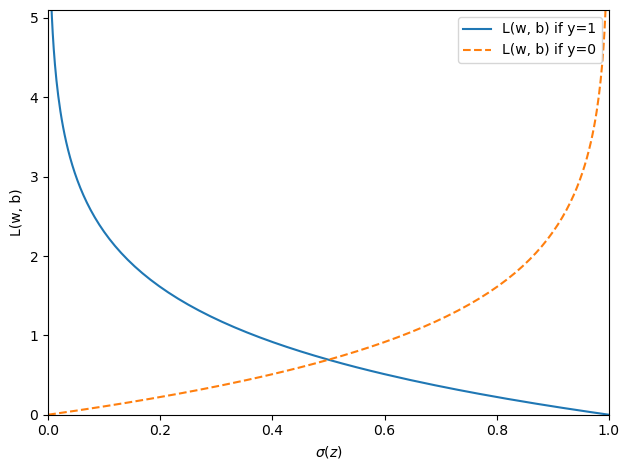

In [42]:
def loss1(z):
  return -np.log(sigmoid(z))

def loss0(z):
    return -np.log(1-sigmoid(z))
  
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel(r'$\sigma (z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

클래스 1에 속한 샘플을 정확히 예측하면 손실이 0에 가까워진다.

클래스 0에 속한 샘플을 정확히 예측하면 손실이 0에 가까워진다.

예측이 잘못되면 손실이 무한대가 된다.


### 3.3.3 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

$$
L(w,b) = \frac{1}{n}\sum_{i=1}^{n}[-y^{(i)}log(\sigma(z^{(i)})) - (1-y^{(i)})log(1-\sigma(z^{(i)}))]
$$

이 함수로 에포크마다 모든 훈련 샘플을 분류하는 손실을 계산한다.

선형 활성화 함수를 시그모이드 활성화로 바꾸어야한다.

In [43]:
class LogisticRegressionGD:
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  
  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (-y.dot(np.log(output) - ((1 - y).dot(np.log(1 -output)))) / X.shape[0])
      self.losses_.append(loss)
    return self
  
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)  

여기에서 직접 구현한 로지스틱 모델은 이진 분류 문제에만 적용할 수 있다.

Iris-setosa와 Iris-versicolor를 분류하는 이진 분류 문제에 적용할 수 있다.

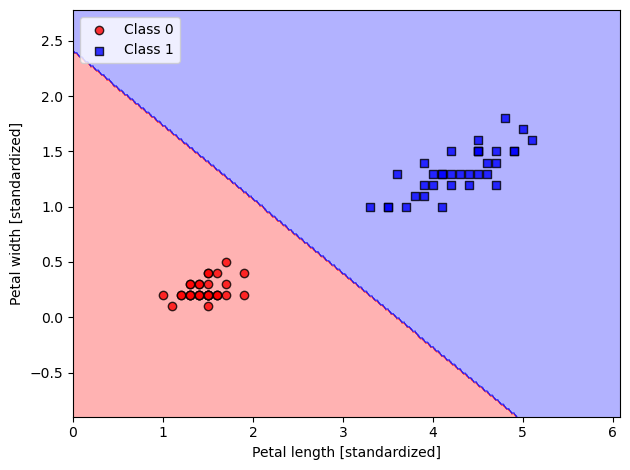

In [44]:
import matplotlib.pyplot as plt
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_dicision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd) # type: ignore
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### 3.3.4 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

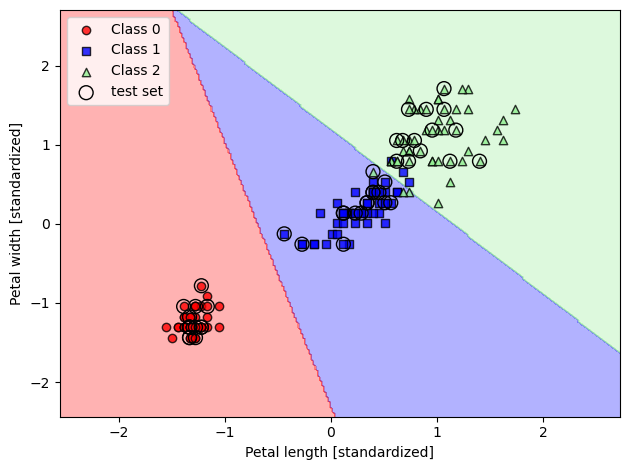

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, multi_class='ovr')

lr.fit(X_train_std, y_train)
plot_dicision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150)) # type: ignore
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

LogisticRegression모델을 훈련할때 "C"매개변수를 사용하여 규제의 강도를 조절할 수 있다.

훈련 샘플이 어떤 클래스에 속할 확률은 predict_proba메서드를 사용하여 계산한다.
```python
lr.predict_proba(X_test_std[:3, :])
```
```shell
array([[0.815, 0.185],
       [0.828, 0.172],
       [0.828, 0.172]])
```

첫 번째 행은 첫번째 붓꽃의 클래스에 소속할 확률을 나타낸다.

두 번째 행은 두 번째 붓꽃의 클래스에 소속할 확률을 나타낸다.

열을 모두 더하면 1이 된다.

### 3.3.5 규제를 사용하여 과대적합 피하기

* *과대적합(overfitting)*은 모델이 훈련 데이터에 너무 잘 맞지만 일반화 성능이 떨어지는 것을 의미한다.
* *과소적합(underfitting)*은 모델이 너무 단순해서 훈련 데이터에 잘 맞지 않는 것을 의미한다.

편향-분산 트레이드오프(bias-variance tradeoff)는 모델의 복잡도가 증가하면 편향은 감소하지만 분산은 증가한다.

머신러닝 모델에서 *분산*은 모델을 여러번 훈련했을 때 특정 샘플에 대한 예측의 일관성(또는 변동성)을 측정한다.
*편향*은 다른 훈련 데이터셋에서 여러번 훈련했을 때 예측이 정확한 값에서 얼마나 벗어났는지를 측정한다.

좋은 편향-분선 트레이드오프를 찾는 한가지 방법으로 규제(regularization)가 있다.

규제는 과도한 파라미터(가중치)값을 제한하기 위해 추가적인 정보를 주입하는 개념이다.

가장 널리 사용되는 규제 방법은 L2규제이다.
$$
L2: \frac{\lambda}{2}||w||^{2} = \frac{\lambda}{2}\sum_{j=1}^{m}w_{j}^{2}
$$

이 식에서 $\lambda$는 규제 하이퍼파라미터이다. 분모의 2는 단순히 스케일링 계수이며 손실의 그레이디언트를 계산할 때 상쇄된다.
샘플크기$n$은 손실과 정규화 항의 스케일을 유사하게 조정하기 위해 추가한다.

>규제와 특성 정규화(normalization)는 다른 개념이다. 특성 정규화는 특성 스케일을 조정하는 것이고 규제는 모델의 복잡도를 제한하는 것이다.

로지스틱 회귀의 손실 함수는 규제항을 추가해서 규제를 적용한다. 규제 항은 모델 훈련 과정에서 가중치를 줄이는 역할을 한다.

$$
L(w, b) = \frac{1}{n}\sum_{i=1}^{n}[-y^{(i)}log(\sigma(z^{(i)})) - (1-y^{(i)})log(1-\sigma(z^{(i)}))] + \frac{\lambda}{2}||w||^{2}
$$

규제가 없는 손실의 편도 함수는 다음과 같다.

$$
\frac{\partial L(w, b)}{\partial w_{j}} = (\frac{1}{n}\sum_{i=1}^{n}(\sigma(w^{T}x^{(i)})-y^{(i)})x_{j}^{(i)}) + \frac{\lambda}{n}w_{j}
$$

규제 하이퍼파라미터 $\lambda$를 사용하여 가중치를 작게 유지하면서 훈련 데이터에서 얼마나 잘 맞출지를 조정할 수 있다
$\lambda$값을 증가하면 규제 강도가 높아진다.

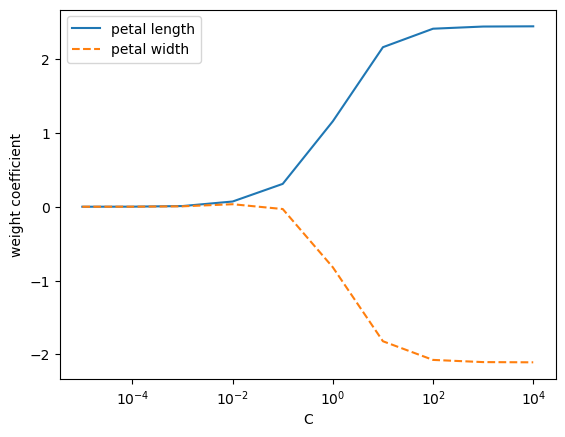

In [46]:
import numpy as np
weights, params = [], []

for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
  
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')

plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## 3.4 서포트 벡터 머신을 사용한 최대 마진 분류

*서포트 벡터 머신(Support Vector Machine, SVM)*은 강력하고 널리 사용되는 학습 알고리즘이다. SVM은 퍼셉트론의 확장으로 생각할 수 있다.

SVM의 최적화 대상은 마진(margin)을 최대화하는 것이다. 마진은 클래스를 구분하는 초평면(결정 경계)과 이 초평면에 가장 가까운 샘플 사이의 거리로 정의된다.

이런 샘플을 서포트 벡터(support vector)라고 한다.

### 3.4.1 최대 마진

큰 마진의 결정 경계를 원하는 이유는 일반화 오차가 낮아지는 경향이 있기 때문이다. 반편 작은 마진의 모델은 과대적합되기 쉽다.

### 3.4.2 슬랙 변수를 사용하여 비선형 분류 문제 다루기

슬랙 변수는 선형적으로 구분되지 않는 데이터에서 SVM 최적화 목적 함수에 있는 선형 제약 조건을 완화할 필요가 있기 때문에 도입되었다. 이를 통해 적절히 손실을 손해 보면서 분류 오차가 있는 상황에서 최적화 알고리즘을 수렴한다.

결국 슬랙 변수를 사용하면 SVM의 C매개변수가 도입된다. C 매개 변수를 사용하여 분류 오차에 대한 패널티를 조정할 수 있다. C 값이 크면 오차에 대한 손실이 커진다. C 값이 작으면 분류 오차에 덜 엄격해 진다.


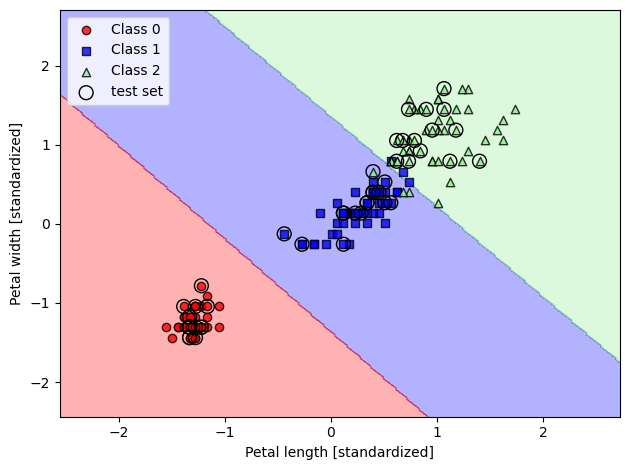

In [47]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_dicision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### 3.4.3 사이킷런을 사용하여 소프트 마진 분류 구현하기

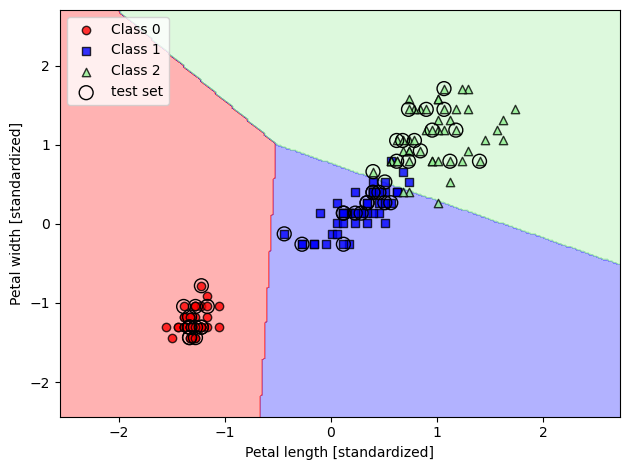

In [48]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

svm.fit(X_train_std, y_train)
plot_dicision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## 3.5 커널 SVM을 사용하여 비선형 문제 풀기

머신 러닝 기술자 사이에서 SVM이 인기가 높은 다른 이유는 비선형 분류 문제를 풀기 위해 커널 방법을 사용할 수 있기 때문이다. 가장 널리 사용되는 SVM 방법인 커널 SVM(kernel SVM)은 선형적으로 구분되지 않는 데이터를 다루기 위해 확장된다.

### 3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법

logical_xor 함수를 사용하여 XOR형태의 간단한 데이터셋(100개의 샘플)을 생성한다.

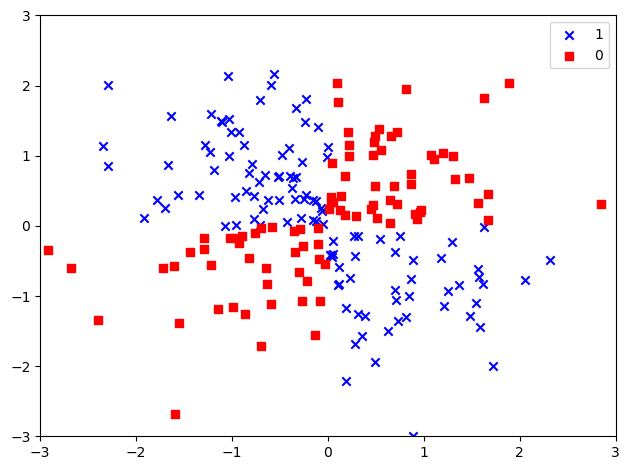

In [49]:
import matplotlib.pyplot as plt
import numpy as np

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='r', marker='s', label='0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

위 코드의 결과에서 알 수 있듯이, 이 결과로는 양성 클래스와 음성 클래스를 선형적으로 구분할 수 없다.

이렇게 선형적으로 구분되지 않는 데이터를 다루는 커널 방법은 데이터를 고차원 공간으로 변환하여 선형적으로 구분되는 초평면을 찾는다.

$$
\phi(x_{1}, x_{2}) = (z_{1}, z_{2}, z_{3}) = (x_{1}, x_{2}, x_{1}^{2}+x_{2}^{2})
$$

### 3.5.2 커널 기법을 사용하여 고차원 공간에서 분한 초평면 찾기

SVM으로 비선형 문제를 풀기 위해 매핑함수$\phi$를 사용하여 훈련 데이터를 고차원 특성 공간으로 변환한다. 그런 다음 선형 SVM 모델을 사용하여 새로운 특성 공간에서 선형적으로 구분되는 초평면을 찾는다.

이런 매핑 방식의 문제점은 새로운 특성을 만드는 계산 손실이 크다는 것이다. 특히 고차원 데이터일 때 그렇다. 여기서 소위 커널 기법(kernel trick)이라고 하는 기법이 도움이 된다. 점곱$\phi(x^{(i)})^{T}\phi(x^{(j)})$를 계산하는 대신 커널 함수$k(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^{T}\phi(x^{(j)})$를 사용하여 계산한다.

커널함수

$$
K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^{T}\phi(x^{(j)})
$$

가장 널리 사용되는 커널 중 하나는 방사 기저 함수 커널(Radial Basis Function, RBF)이다.

$$
K(x^{(i)}, x^{(j)}) = exp{-\frac{||x^{(i)}-x^{(j)}||^{2}}{2\sigma^{2}}}
$$

간단하게
$$
K(x^{(i)}, x^{(j)}) = exp(-\gamma||x^{(i)}-x^{(j)}||^{2})
$$

여기서 $\gamma=\frac{1}{2\sigma^{2}}$은 최적화 대상 파라미터가 아니다.

대략적으로 커널이란 용어를 샘플 간의 유사도 함수로 생각할 수 있다.

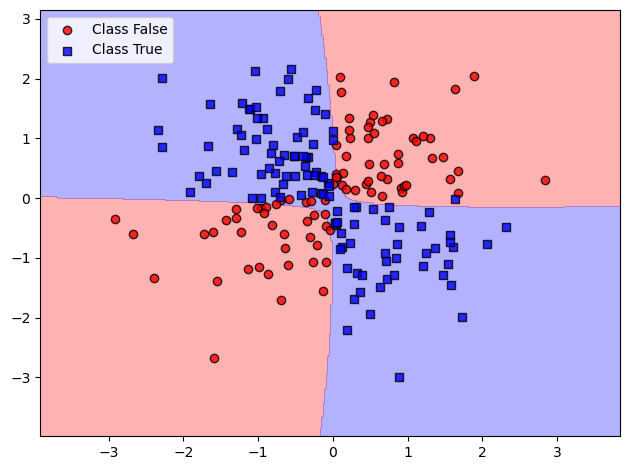

In [50]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_dicision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

비교적 커널SVM은 XOR데이터를 잘 구분한다.

gamma=0.1로 지정한$\gamma$매개변수를 가우스 구(gaussian sphere)의 크기를 제한하는 매개변수로 이 해할 수 있다. $\gamma$값을 크게 하면 서포트 벡터의 영향이나 범위가 줄어든다. 결정경게는 더욱 샘플에 가까워지고 구불구불해진다.

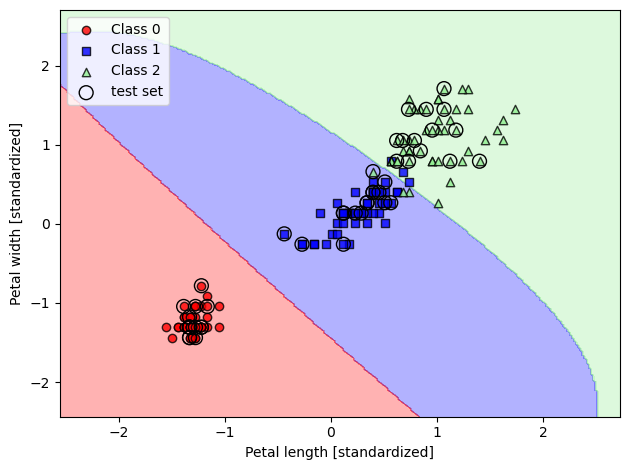

In [51]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_dicision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

$\gamma$값을 크게 하고 결정 경계에 미치는 영향을 살펴보자.

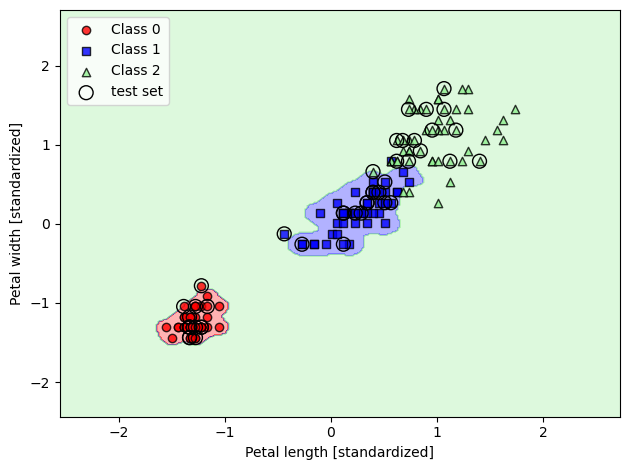

In [52]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_dicision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

이런 분류기는 훈련 데이터에서는 잘 맞지만 테스트 데이터에서는 성능이 좋지 않다. 이런 모델은 과대적합되었다고 말한다.

## 3.6 결정 트리 학습

*결정 트리(decision tree)*는 분류와 회귀 문제에 널리 사용되는 모델이다.

결정 트리는 훈련 데이터에 있는 특성을 기반으로 샘플의 크랠스 레이블을 추정할 수 있는 일련의 질문을 학습한다.

결정 알고리즘을 사용하면 트리의 루트에서 시작해서 정보 이득(information gain)이 최대가 되는 특성으로 데이터를 나눈다. 반복 과정을 통해 리프 노드(leaf node)가 순수해질 때까지 모든 자식 노드에서 분할 작업을 반복한다.

### 3.6.1 정보 이득 최대화: 자원을 최대로 활용하기

가장 정보가 풍부한 특성으로 노드를 나누기 위해 트리 알고리즘으로 최적화할 목적 함수를 정의한다. 이 목적 함수는 각 분할에서 정보 이득을 최대화하는 것이다.

$$
IG(D_{p}, f) = I(D_{p}) - \sum_{j=1}^{m}\frac{N_{j}}{N_{p}}I(D_{j})
$$

여기에서 $f$는 분할에 사용할 특성이다. $D_{p}$와 $D_{j}$는 부모 노드와 $j$번째 자식 노드의 데이터셋이다. I는 불순도(impurity)를 측정하는 함수이다. $N_{p}$는 부모 노드의 샘플 전체 개수이고 $N_{j}$는 $j$번째 자식 노드의 샘플 개수이다.
정보 이득은 단순히 부모 노드의 불순도와 자식 노드의 불순도 합의 차이이다. 자식 노드의 불순도가 낮을수록 정보 이득이 커진다. 구현을 간단하게 하고 탐색 공간을 줄이기 위해 이진 결정 트리만 고려한다. 즉 부모 노드는 두개의 자식 노드로 나뉜다.

$$
IG(D_{p}, f) = I(D_{p}) - \frac{N_{left}}{N_{p}}I(D_{left})-\frac{N_{right}}{N_{p}}I(D_{right})
$$

이진 결정 트리에 널리 사용되는 세개의 분순도 지표 또는 분할 조건은 지니 불순도(Gini impurity), 엔트로피(entropy), 분류 오차(classification error)이다.

샘플이 있는 모든 클래스 $(p(i|t)\neq 0$에 대해 다음과 같이 정의된다.

$$
I_{H}(t) = -\sum_{i=1}^{c}p(i|t)log_{2}p(i|t)
$$

여기에서 $p(i|t)$는 노드 t에서 클래스 i에 속한 샘플의 비율이다. 한 노드의 모든 샘플이 같은 클래스이면 엔트로피는 0이 된다. 클래스 분포가 균등하면 엔트로피는 최대가 된다.

예를 들어 이진 클래스일 경우 $p(i=1|t)=1$또는 $p(i-0|t) = 0$이면 엔트로피는 0이다. 클래스가 $p(i=1|t)=0.5$와 $p(i=0|t)=0.5$일 경우 엔트로피는 1이 된다.

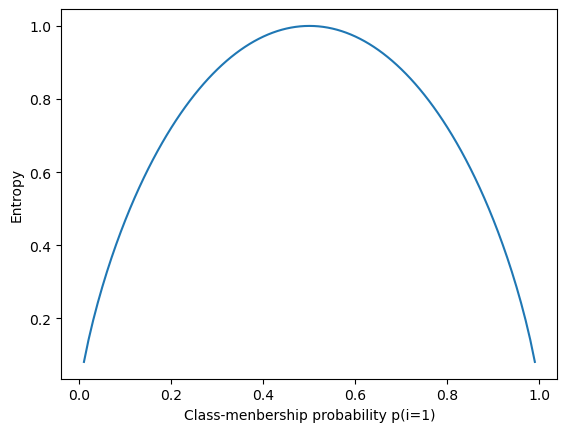

In [53]:
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-menbership probability p(i=1)')
plt.plot(x, ent)
plt.show()

지니 불순도는 잘못 분류될 확률을 최소화하기 위한 기준으로 이해할 수 있다.

$$
I_{G}(t) = \sum_{i=1}^{c}p(i|t)(1-p(i|t)) = 1-\sum_{i=1}^{c}p(i|t)^{2}
$$

엔트로피와 비슷하게 지니 불순도는 클래스가 완벽하게 섞여 있을 때 최대가 된다. 이진 클래스 환경(c=2)에서는 다음과 같다.

$$
I_{G}(t) = 1-\sum_{i=1}^{c}0.5^{2} = 0.5
$$

셀제로는 지니 불순도와 엔트로피 모두 매우 비슷한 결과가 나온다. 보통 불순도 조건을 바꾸어 트리를 평가하는 것보다 가지치기 수준을 맞추면 튜닝하는 것이 훨씬 낫다.

**분류 오차**

$$
I_{E}(t) = 1-max\{p(i|t)\}
$$

가지치기에는 좋은 기준이지만 결정트리를 구성하는 데는 권장하지 않느다. 노드의 클래스 확률 변화에 덜 민감하기 때문이다.

부모 노드에서 데이터셋 $D_{p}$로 시작한다. 이 데이터셋은 클래스 1이 40개 샘플, 클래스 2가 40개 샘플로 이루어져 있다. 이를 2개의 데이터셋 $D_{left}$와 $D_{right}$로 나눈다. 분류 오차를 분할 기준으로 사용했을 때 정보 이득은 다음과 같다.

시나리오 $A\cdot B$가 동일하다 $(IG_{E} = 0.25)$

$$
I_{E}(D_{p}) = 1-0.5 = 0.5
$$
$$
A:I_{E}(D_{left})=1\frac{3}{4}=0.25
$$
$$
A:I_{E}(D_{right})=1\frac{3}{4}=0.25
$$
$$
A:IG_{E}=0.5-\frac{4}{8}0.25-\frac{4}{8}0.25=0.25
$$
$$
B:I_{E}(D_{left})=1\frac{4}{6}=\frac{1}{3}
$$
$$
B:I_{E}(D_{right})=1-1=0
$$
$$
B:IG_{E}=0.5-\frac{6}{8}\times\frac{1}{3}-\frac{2}{8}0=0.25
$$

지니 불순도는 시나리오$A(IG_{G}=0.125)$보다 시나리오$B(IG_{G}=0.1\bar6)$가 더 순수하기 때문에 값이 높다.

$$
I_{G}(D_{p}) = 1-(0.5^{2}+0.5^{2})=0.5
$$
$$
A:I_{G}(D_{left})=1=((\frac{3}{4})^2+(\frac{1}{4})^2)=\frac{3}{8}=0.375
$$
$$
A:I_{G}(D_{right})=1=((\frac{1}{4})^2+(\frac{3}{4})^2)=\frac{3}{8}=0.375
$$
$$
A:IG_{G}=0.5-\frac{4}{8}0.375-\frac{4}{8}0.375=0.125
$$
$$
B:I_{G}(D_{left})=1=((\frac{4}{6})^2+(\frac{2}{6})^2)=\frac{4}{9}=0.\bar{4}
$$
$$
B:I_{G}(D_{right})=1-(1^2+0^2)=0
$$
$$
B:IG_{G}=0.5-\frac{6}{8}\times0.\bar{4}-\frac{2}{8}0=0.1\bar{6}
$$

비슷하게 엔트로피 기준도 시나리오$A(IG_{H}=0.188)$보다 시나리오$B(IG_{H}=0.311)$를 선호한다.

$$
I_{H}(D_{P})=-(0.5log_{2}(0.5)+0.5log_{2}(0.5))=1
$$
$$
A:I_{H}(D_{left})=-(\frac{3}{4}log_{2}(\frac{3}{4})+\frac{1}{4}log_{2}(\frac{1}{4}))=0.81
$$
$$
A:I_{H}(D_{right})=-(\frac{1}{4}log_{2}(\frac{1}{4})+\frac{3}{4}log_{2}(\frac{3}{4}))=0.81
$$
$$
A:IG_{H}=1-\frac{4}{8}0.81-\frac{4}{8}0.81=0.19
$$
$$
B:I_{H}(D_{left})=-(\frac{4}{6}log_{2}(\frac{4}{6})+\frac{2}{6}log_{2}(\frac{2}{6}))=0.92
$$
$$
B:I_{H}(D_{right})=0
$$
$$
B:IG_{H}=1-\frac{6}{8}0.92-\frac{2}{8}0=0.31
$$

앞서 나온 세 개의 불순도 기준을 시각적으로 비교하기 위해 클래스 1의 확률 범위를 [0, 1] 에 대한 불순도 인덱스를 그려보자

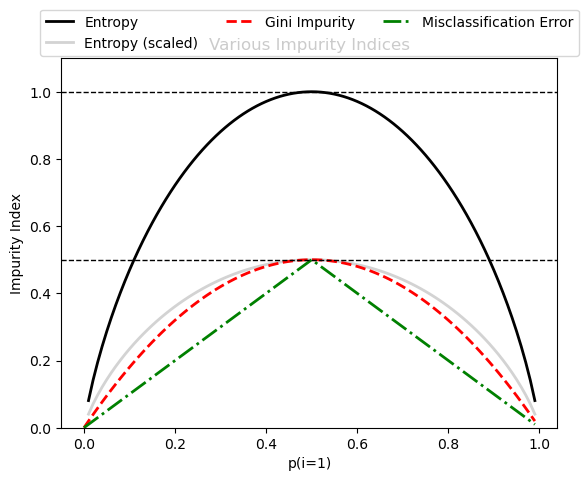

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
  return p*(1-p) + (1-p)*(1-(1-p))

def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
  return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

sc_ent = [e*0.5 if e else None for e in ent]

err = [error(i) for i in x]

fig = plt.figure()

ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
  
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.title('Various Impurity Indices')
plt.show()

### 3.6.2 결정 트리 만들기

결정 트리는 공간을 사각 격자로 나누기 때문에 복잡한 결정 경계르 만들 수 있다.

결정 트리가 깊어질수록 결정 경계가 복잡해지고 고대적합되기 쉽기 때문에 주의해야 한다.
사이킷런을 사용하여 지니 불순로 조건으로 최대 깊이가4인 결정트리를 훈련한다.

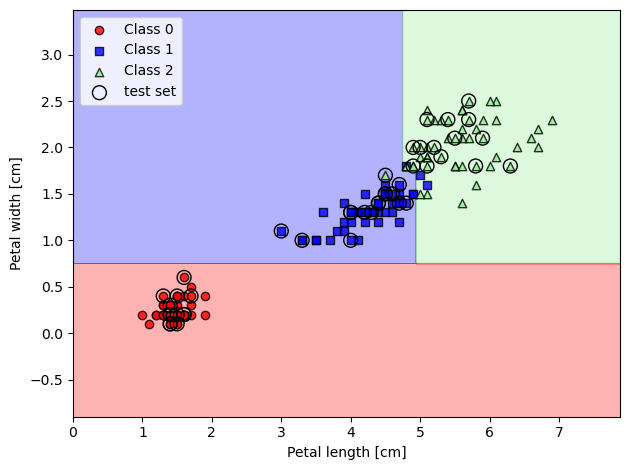

In [55]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_dicision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

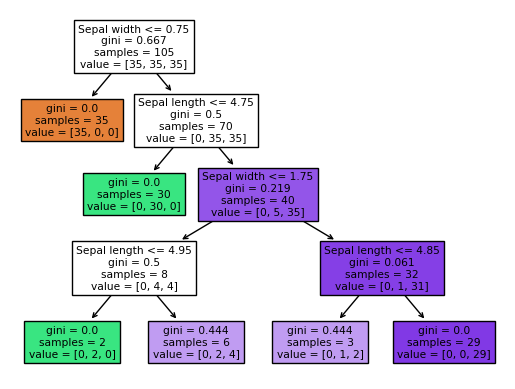

In [56]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(
  tree_model,
  feature_names=feature_names,
  filled=True # 색을 채워서 표시합니다.
  )
plt.show()

결정 트리 이미지를 보면 결정 트리가 훈련 데이터셋에서 선택한 분할을 손쉽게 분석할 수 있다.

각 노드의 분할 기준에 따라 왼쪽 가지는"True" 오른쪽 가지는 "False"로 표시한다.

루트 노드를 보면 맨 처음 105개의 샘플로 시작한다. 첫 번째 분할은 꽃받침 너비 $\leq0.75cm$기준을 사용하여 루트 노드를 35개(왼쪽)와 70개(오른쪽)로 나눈다.

첫 번째 분할로 왼쪽 노드는 이미 Iris-setosa클래스의 샘플만 가진 순수 노드가 된다. 오른쪽에서 분할이 더 일어나 Iris-versicolor와 Iris-virginica를 구분하는 결정 경계를 찾는다.

### 3.6.3 랜덤 포레스트로 여러 개의 결정 트리 연결하기

앙상블 방법은 뛰어난 성능과 과대적합에 안정적이기 때문에 지난 10년간 머신 러닝 애플리케이션에서 큰 인기를 얻었다.

랜덤 포레스트는 결정 트리의 *앙상블(ensemble)*로 생각할 수 있다. 랜덤 포레스트 이면의 아이디어는 여러 개의 결정 트리를 평균 내는 것이다. 개개의 트리는 분산이 높은 문제가 있지만 앙상블은 견고한 모델을 만들어 일반화 성능을 높이고 과대 적합의 위험을 줄인다. 

**랜덤 포레스트 알고리즘 4단계**

1. n개의 랜덤한 부트스트랩 샘플을 뽑는다